<a href="https://colab.research.google.com/github/natnew/Python-Projects-Teach-A-Computer-To-Raed/blob/main/number_recognition_starter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
def plot_accuracy_and_loss(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(acc, label='Training Accuracy')
  plt.plot(val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.ylabel('Accuracy')
  plt.ylim([min(plt.ylim()),1])
  plt.title('Training and Validation Accuracy')

  plt.subplot(2, 1, 2)
  plt.plot(loss, label='Training Loss')
  plt.plot(val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.ylabel('Cross Entropy Loss')
  plt.ylim([0,1.0])
  plt.title('Training and Validation Loss')
  plt.xlabel('epoch')
  plt.show()

In [ ]:
IMAGE_SIZE = 28
training_labels = None

def get_image_from_url(image_url):
  # If the temporary test_image.jpg file already exists, 
  # delete it so a new one can be made.
  if os.path.exists('/root/.keras/datasets/test_image.jpg'):
    os.remove('/root/.keras/datasets/test_image.jpg')

  image_path = tf.keras.utils.get_file('test_image.jpg', origin=image_url)
  return image_path

def predict_image(image_url, labels = training_labels):
  image_path = get_image_from_url(image_url)
  
  image = tf.keras.preprocessing.image.load_img(image_path, target_size=(IMAGE_SIZE, IMAGE_SIZE)).convert('L')

  plt.figure()
  plt.imshow(image, cmap='gray')

  image = tf.keras.preprocessing.image.img_to_array(image)
  image = np.expand_dims(image, axis=0)
  prediction_result = model.predict(image, batch_size=1)
  print('Your model predicts this number is {}'.format(prediction_result.argmax()))

Load the MNIST data you'll use to train your model.

In [ ]:
numbers = tf.keras.datasets.mnist

Explore your data and print out a number.

In [ ]:
(training_images, training_labels), (validation_images, validation_labels) = numbers.load_data()

11501568/11490434 [==============================] - 0s 0us/step


Divide your images so all their colour values are between 0 and 1.

5


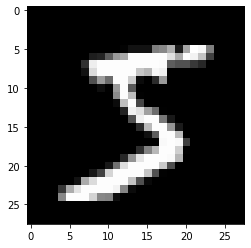

In [ ]:
plt.imshow(training_images[0], cmap='gray')
print(training_labels[0])

Build your model out of layers.

In [ ]:
print(training_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

Compile your model and look at its structure.

In [ ]:
training_images = training_images / 255.0
validation_images = validation_images / 255.0

In [ ]:
model = tf.keras.Sequential([
                                    tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(500, activation='relu'),
                                    tf.keras.layers.Dense(300, activation='relu'),
                                    tf.keras.layers.Dense(10, activation= 'softmax')
                                    ])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 500)               392500    
_________________________________________________________________
dense_1 (Dense)              (None, 300)               150300    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                3010      
Total params: 545,810
Trainable params: 545,810
Non-trainable params: 0
_________________________________________________________________


Train your model.

In [ ]:
history = model.fit(training_images,
                    training_labels,
                    batch_size=100,
                    epochs=10,
                    validation_data = (validation_images, validation_labels)
                    )

Epoch 1/10
600/600 [==============================] - 8s 13ms/step - loss: 0.7938 - accuracy: 0.7638 - val_loss: 0.3900 - val_accuracy: 0.8840
Epoch 2/10
600/600 [==============================] - 8s 13ms/step - loss: 0.3494 - accuracy: 0.8985 - val_loss: 0.2991 - val_accuracy: 0.9125
Epoch 3/10
600/600 [==============================] - 8s 13ms/step - loss: 0.2882 - accuracy: 0.9158 - val_loss: 0.2700 - val_accuracy: 0.9211
Epoch 4/10
600/600 [==============================] - 8s 13ms/step - loss: 0.2443 - accuracy: 0.9290 - val_loss: 0.2319 - val_accuracy: 0.9323
Epoch 5/10
600/600 [==============================] - 8s 13ms/step - loss: 0.2091 - accuracy: 0.9385 - val_loss: 0.1925 - val_accuracy: 0.9441
Epoch 6/10
600/600 [==============================] - 8s 13ms/step - loss: 0.1783 - accuracy: 0.9477 - val_loss: 0.1688 - val_accuracy: 0.9497
Epoch 7/10
600/600 [==============================] - 8s 13ms/step - loss: 0.1564 - accuracy: 0.9539 - val_loss: 0.1522 - val_accuracy: 0.9534

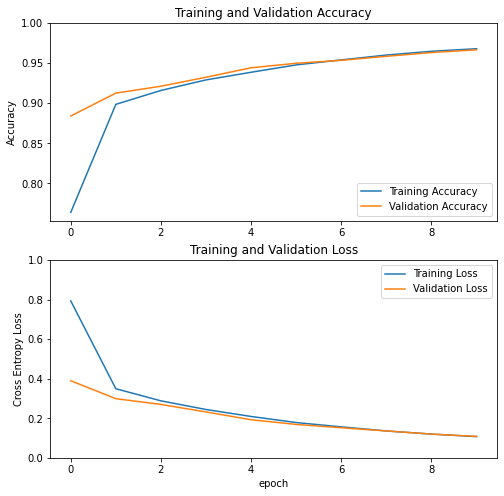

In [ ]:
plot_accuracy_and_loss(history)

Test your model.

16384/4602 [==========================================================================================================] - 0s 0us/step
Your model predicts this number is 2


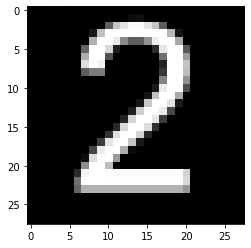

In [ ]:
predict_image('http://dojo.soy/num2')